\title{Tutotrial4-Time Evolution and Quantum System Dynamics} \author{Tsemo Peniel Bertrand-September 24th 2020} 
\maketitle

\section{Introduction}

The dynamic of quantum systems is totally described by the Shrödinger equation $i\hbar\fr{d\ket{\psi}}{dt}=\mt{H}\ket{\psi}$. Using this equation, we can theoretically  prevent the behavior of every quantum system (of course knowing his initial state). What about the numerical side of the of this ? With QuTiP, we can numerically solve the Shrödinger equation and prevent the behavior of the properties of a dynamic system.

In this notebook, we will first see how to manipulate the dynamic simulation results. Secondly, we will sumilate the classical Stern-Gerlach experiment and the quantum Stern-Gerlach experiment.And finally, we will train ourselves by doing some exercices on simulations of quantum dynamic systems.

In [36]:
%matplotlib inline

from collections import namedtuple

from qutip import Qobj,tensor,variance,ket,bra,basis,Bloch
import matplotlib.pyplot as plt
import numpy as np

\section{Dynamics simulation results}

\subsection{Solving the Shrödinger equation}

The QuTiP library uses the `qutip.sesolve, qutip.essolve` and `qutip.mesolve` functions to solve the shrödinger equation. The syntax is `sesolve(H,state,times,[ops])` where:
- `H`is the hamiltonian of the system
- `state` is the initial state of the system
- `times` is the time interval during whichthe siumlation is done given by the function `linspace(initial time,last time, step)`
- `[ops]`: is a list of operators which expectations values will be evaluated

The informations returned by the `qutip.sesolve and qutip.essolve` functions are stored in the `qutip.solver.result` which contain all data needed for the simulation.

\subsection{The `solver.Result` Class}

As we where just saying, the QuTiP object used for returning the simulation data to the user called the `qutip.solver.Result` or `Result` class. It is important to understand that in contrast to the `qutip.Qobj` class, the `qutip.solver.Result` class contains no method; it is nothing but a container. howevver, it has a collection of properties used for storing information. A generic `Result` object is called `result` and contains the followings properties:

 |Property |Description|
 | :------ | :------  |                                 
 |`result.solver`    |Tells about the solver used to generate data    |
 |`result.times`        | List/array of times at which simulation data are calculated|
 |`result.expect`      | List/array of expectation values if requested |
 |`result.states`| List/array of states vectors/density matrices calulated at `times` if requested|
 |`result.num_expect`| number of expectation value operators in the simulation|
 
 
 ### Accesing Result data

To see what is contained in a `result` object, we use the python `print` function as :
> `print(result)`

Let's admit that we have done a simulation and we want the first two expectation values evaluated in the `result` object.
We can proceed like:
> `exp0=result.expect[0]` #to have the first expectation value of the first oprerator evaluated
>
> `exp1=result.expect[1]` #to have the second expectation value of the second operator evaluated 

To have the array of times at which all the expectations values are have been calculated:

> `times=result.times`

We can access to the states evaluated at `times` typing
> `states=result.states`

We can also plot the reulting expectations values `exp0` and `exp1` at `times` typing:
>`plot(times,exp0,times,exp1)` #plot exp0 and exp1 on the same graph at times
>
> `show()` #display the graph

Similarly, we can get to the other properties of a `result` object.

### Saving and loading Result objects
The result data object allows as simply as possible storing and retrieving simulation data. The `qutip.fileio.qsave` and `qutip.fileio.qload` functions are used for this task. For demonstration, let us save the previous data object in a file called *Tsemo_simulation*.
> `qsave(result,'Tsemo_simulation')`

The data results are then all saved in a single file with the *.qu* extension

To load the data of a simulation after saving it, we use the `qutip.fileio.load` function. To load the data previously saved in the file `Tsemo_simulation.qu` and store it in a result object named *stored_result*:
>`stored_result=qload('Tsemo_simulation')`

### Exemple of unitary evolution

  Let's simulate the evolution of a spin 1/2 in the interval $[1,10]$. the hamiltonian of the system is $\mt{H}=\fr{2\pi}{10}\sigma_x$ and the expectations values evaluated are $\bra{\psi(t)}\sigma_z\ket{\psi(t)}$ and $\bra{\psi(t)}P_1\ket{\psi(t)}$ at any time included in the interval $[1,10]$ where $\mt{P_1}=\ket{1}\bra{1}$ 
   - We will use the function `qutip.sesolve` to evolve the system 
   - the library `matplotlib` will be used for plotting expectations values's evolutions.
   - linspace(1,10,100) to define the time interval with  step of $1/10$

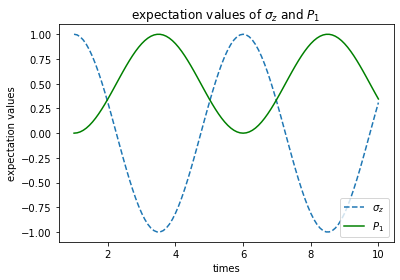

In [5]:
""" 
Evolution example; inspired from introduction à la mécanique quantique @Pr. Nana Engo
"""

psi0=basis(2,0) # Définition of the initial state

H=(2.*np.pi/10)*sigmax(); # Hamiltonian
P1=basis(2,1).proj();  # Projector P1
times=np.linspace(1,10,100); # different times
result=sesolve(H,psi0,times,[sigmaz(),P1]);

# trace of the evolution
fig,ax=plt.subplots();
ax.plot(result.times,result.expect[0], ls='--',label='$\sigma_z$');
ax.plot(result.times,result.expect[1], ls='-',label='$P_1$',color='green');
ax.set_ylabel("expectation values");
ax.set_xlabel("times");
ax.set_title('expectation values of $\sigma_z$ and $P_1$');
ax.legend(loc=4);

\section{Performing quantum measurements in QuTiP}

\subsection{The Stern-Gerlach Experiment}

### Apparatus
![*Stern-Gerlach experiment*](SG.png "Stern-Gerlach experiment")


*Since classical physics, it had been accepted that atoms could behave like tiny magnets.The BOHR atom model learn us that when an electron orbites around the atomic nucleus, it generates a magnetic field. it is thus normal to think that atoms can be deflected by an inhiomogenous magnetic field*

*Stern had the intuition that we could exploit this deflection to understand the **magnetic moment** of atoms and Gerlach brought the experimental expertise.*

*The force applied to atoms in the Stern-Gerlach apparatus has the form:* $$\begin{array}{ccc} F_z&=&\mu_z \dpz{B}\\ &=&(\hat{\mu}\cdot\hat{z})|\mu|\dpz{B} \\& \propto &\hat{\mu} \cdot\hat{z} \end{array}$$

$\hat{\mu}$ *is the magnetic moment (strenght and direction of the atom's magnetic field) and $\hat{z}$ is the direction in which magnetic field varies (and which the measurement is made).*

*By hypothesis, the magnitude of the atom's magnetic moment and the inhomogeneity of the magnetic field are constant, that allow us to say that $F_z$ is proportionnal to the dot product of $\hat{\mu}$ and $\hat{z}$.*

### Simulation of Stern-Gerlach in Python
   From the point of view of classical physics, atoms should form a finite size task in front of the Stern-gerlach apparatus.
    
To simulate this behavior of atoms in Python, we can begin by generating random space directions of atoms:

In [63]:
Direction=namedtuple("Direction",["theta","phi"]) # a tuple named "Direction"

def random_direction(): # the function to generate a random direction
    
    r=0
    while r==0: #a condition to generate only one direction
        x,y,z=np.random.normal(0,1,3) #three random numbers following a Guaussian normal law 
        r=np.sqrt(x**2+y**2+z**2) #distance from the center of the sphere to point of x,y, z coordinates
    phi=np.arctan2(y,x)
    theta=np.arccos(z/r)
    return Direction(theta=theta,phi=phi) #giving values to the variables "theta" and "phi" in the namedtuple "direction"    

Now we will prepare a classical spin state of spacial coordinates ($\sin{\theta}\cos{\varphi},\sin{\theta}\sin{\varphi},\cos{\theta}$) for a given random direction 

In [64]:
def classical_state(d):
    x=np.sin(d.theta)*np.cos(d.phi)
    y=np.sin(d.theta)*np.sin(d.phi)
    z=np.cos(d.theta)
    return np.array([x,y,z])

After that, we measure the z-component of the classical spin sate previously prepared

In [65]:
classical_up=np.array([0,0,1])
def classical_spin(c):
    return classical_up.dot(c) # multiply the components of "c" and "classical up" to take only z-component of "classical_state"

Now we simulate the Stern-Gerlach experiment classically.

In [66]:
def classical_Stern_gerlach(n):
    directions=[random_direction()  for _ in range(n)] # calling the  "random_direction" function to generate a list of "n" random directions
    atoms=[classical_state(d) for d in directions] #calling the  "classical_state" function to generate a list of n states
    spins=[classical_spin(c) for c in atoms] # calling the function classical_spin to measure the z-component of spin
    return atoms,spins

Now we will plot the classical result to understand what the classic physics prevent about the Stern-Gerlach experiment:

In [127]:
def plot_classical_stern_gerlach(atoms,spins):
    fig=plt.figure(figsize=(18.0,8.0)) #figure instance 
    fig.suptitle('Classical outcome of Stern-Gerlach experiment',fontsize="xx-large")
    
    ax1=plt.subplot(1,2,1,projection='3d')
    ax2=plt.subplot(1,2,2)
    
#Bloch sphere to view the classical spin states

    b=Bloch(fig=fig,axes=ax1) #supply matplotlib to use "ax1" of the figure instance "fig" for ploting the bloch sphere
    b.vector_width=0.8
    b.vector_color=["#ff{:x}0ff".format(i,i) for i in range(10)]
    b.zlabel=["$+z$","$-z$"] #label the +z and -z components by  "+z" and "-z"   
    b.add_vectors(atoms) # add all vectors in "atoms" in "atoms"
    b.render(fig=fig,axes=ax1) #render the bloch sphere with data in 

#histogramm to vizualize what is on the beam in front of the Stern-Gerlach apparatus

    ax2.hist(spins) #calling the matplotlib "hist" method to plot a histogramm   
    ax2.set_xlabel("Z-component of spin") # at axes x, the Z-components of atoms's spins
    ax2.set_ylabel("number of atoms")

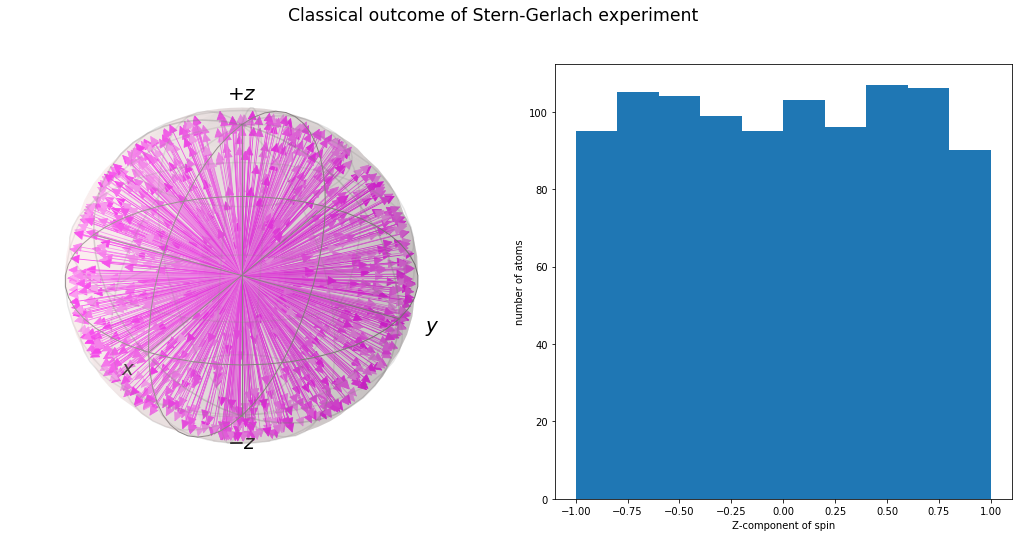

In [128]:
atoms,spins=classical_Stern_gerlach(1000)
plot_classical_stern_gerlach(atoms,spins)

### Simulation of the Stern-Gerlach in QuTiP

Simulation of a simple quantum system

Let's take the spin state of an arbitrary atom through the inhomogenous magnetic field is $\ket{\psi}=\cos{\fr{\theta}{2}}\ket{0}+e^{i\varphi}\sin{\fr{\theta}{2}}\ket{1}$

in QuTiP, this spin state can be prepared using the following function

**In what follows, we will always take `up=|0>` and `down=|1>`.**

In [106]:
up=ket('0')
down=ket('1')


def quantum_state (d):
    return np.cos(d.theta/2)*up+np.exp(1j*d.phi)*np.sin(d.theta/2)*down # An arbitrary spin state

Now we will define a function to measure the Z_component of the spin. For an arbitrary state $\ket{\psi}=\cos{\fr{\theta}{2}}\ket{0}+e^{i\varphi}\sin{\fr{\theta}{2}}\ket{1}$, the Z- component of spin is **1** if the probability to obtain $\ket{0}$, $|\langle0|\psi\rangle|^2$ to greater than a random number we will choose in the interval $[0.0,1.0]$ and **-1**  if $|\langle0|\psi\rangle|^2$ is less than the random number.

Let's go:

In [116]:
def quantum_spin(q):
    a_up=up.dag()*q # probability amplitude to obtain the state 0
    prob_up=np.abs(a_up)**2  #probability to obtain the state 0
    return 1 if np.random.random()<=prob_up else -1 #quantum measurement

 Then the simulation of the Stern-Gerlach experiment: This simulation is similar to the classical case just that `classical_state` and `classical_spin` functions used in the classical case are repectively replaced by the `quantum_state` and `quantum_spin` functions.

In [117]:
def quantum_Stern_gerlach(n):
    directions=[random_direction()  for _ in range(n)] # calling the  "random_direction" function to generate a list of "n" random directions
    atoms=[quantum_state(d) for d in directions] #calling the  "quantum_state" function to generate a list of n states
    spins=[quantum_spin(c) for c in atoms] # calling the function quantum_spin to measure the z-component of spin
    return atoms,spins

Hence, we will plot the results similarly to the classical case:

In [129]:
def plot_quantum_stern_gerlach(atoms,spins):
    fig=plt.figure(figsize=(18.0,8.0)) #figure instance 
    fig.suptitle('Quantum outcome of Stern-Gerlach experiment',fontsize="xx-large")
    
    ax1=plt.subplot(1,2,1,projection='3d')
    ax2=plt.subplot(1,2,2)
    
#Bloch sphere to view the classical spin states

    b=Bloch(fig=fig,axes=ax1) #supply matplotlib to use "ax1" of the figure instance "fig" for plotting the bloch sphere
    b.vector_width=0.8
    b.vector_color=["b".format(i,i) for i in range(10)]  
    b.add_states(atoms) # add all states in "atoms" in "atoms"
    b.render(fig=fig,axes=ax1) #render the bloch sphere with datas on 

#histogramm to vizualize what is on the beam in front of the Stern-Gerlach apparatus

    ax2.hist(spins) #calling the matplotlib "hist" method to plot a histogramm   
    ax2.set_xlabel("Z-component of spin") # at axes x, the Z-components of atoms's spins
    ax2.set_ylabel("number of atoms")

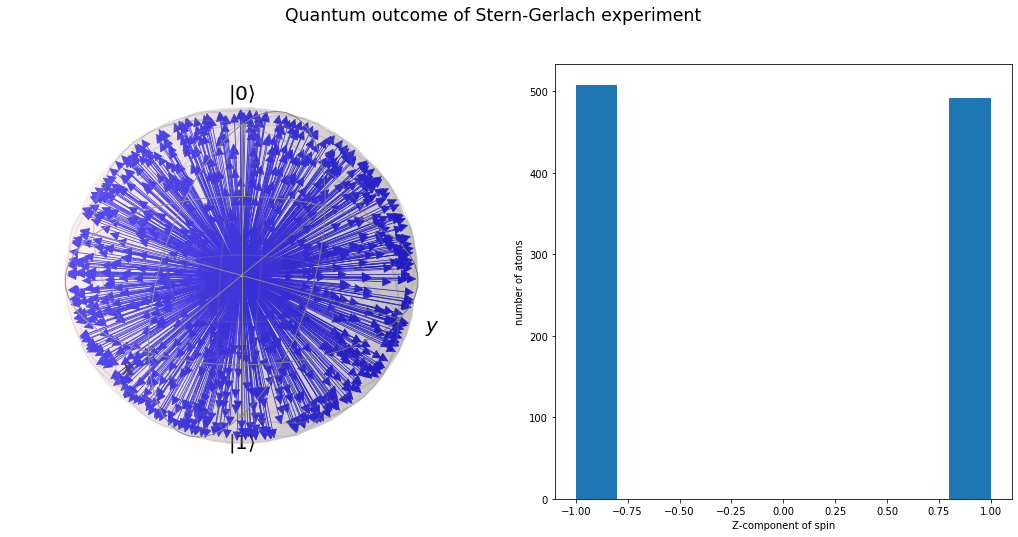

In [130]:
atoms,spins=quantum_Stern_gerlach(1000)
plot_quantum_stern_gerlach(atoms,spins)

\subsection{Exercises}

### Exercise 3.4.2 QuTiP-ECOC (Questions 3 and 4 relative to dynamic)

The Hamiltonian of a system expressed in the standard base $\{\ket{u_1},\ket{u_2},\ket{u_3}\}$ is given by $\mt{H}=\begin{pmatrix}  2 & -3\sq{2} & 3\sq{2}\\ -3\sq{2} & -1 & -3\\ 3\sq{2} & -3 & -1 \end{pmatrix}$.
We want to simulate the evolution in time of this system in the time interval $[1,10]$ and determine his properties especially his mean square deviation at the last time ($t=10$).
By definition, solving the evolution equation for an intial state $\ket{\psi_0}$, we obtain that the state of the system at any time is $$\ket{\psi(t)}=\exp{(-\fr{t-t_0}{\hbar}\mt{H})\ket{\psi(t_0)}}$$ where $t_0$ is the intial time.

First of all, we have to define the hamiltonian and intial state of the system.$\ket{u_1}=\ket{0}=\begin{pmatrix}1\\0\\0\end{pmatrix}$

In [19]:
H=Qobj([[2,-3*sqrt(2),3*sqrt(2)],[-3*sqrt(2),-1,-3],[3*sqrt(2),-3,-1]])
u1=ket('0',3)

After the initial state is defined, we will elvolve the system using the`qutip.sesolve` qutip function.

As we were saying upper, the syntax of the function sesolve is `sesolve(H,initial_state, times, [ops])`. In this case , our initial state is $\ket{\psi_0}$=`u1`. To choose ten arbitrary times in the interval $[1,10]$, we will use the `numpy.linspace` typing `times=linspace(1,10,10)`. Finally, any expecttion value is evaluated. Therefore, the part `[ops]` is replacd by `[]`.

In [10]:
times=linspace(1,10,10)
result=sesolve(H,u1,times,[])

The output of entry `6`, inform us that there states in the result object containing data of the simulation.To print those states, we we can the property `states` of the `Result` object `result` typing `result.states`

In [16]:
print('les états évalués pendant l\'évolution sont\n',result.states )

les états évalués pendant l'évolution sont
 [Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]], Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[-0.39957186-0.87308022j]
 [-0.1796567 +0.08221979j]
 [ 0.1796567 -0.08221979j]], Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[-0.55157807+0.63863187j]
 [ 0.28714008+0.24800414j]
 [-0.28714008-0.24800414j]], Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[ 0.63401914+0.18449827j]
 [ 0.1483787 -0.50987628j]
 [-0.1483787 +0.50987628j]], Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[-0.06172737-0.41966654j]
 [-0.63352538+0.09316895j]
 [ 0.63352538-0.09316895j]], Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[-0.12942694+0.08392881j]
 [ 0.38007926+0.58620991j]
 [-0.38007926-0.58620991j]], Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[

Once we get the ten states evaluated during the evolution of the system, we can pick the last state $\ket{\psi(t=10)}$ usingt the syntax `result.states[9]` understanding that the first element arrays has 0 for index, thus the last element has 9 for index.

In [17]:
psi10=result.states[9]
print(psi10)

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[-0.54760283-0.62279895j]
 [ 0.29672833-0.26091876j]
 [-0.29672833+0.26091876j]]


Finally, let's compute the standard deviation $\sq{\av{\mt{H}^2}-\av{\mt{H}}^2}$ for this state. In QuTiP this standard deviation is $\sq{variance(\mt{H})}$ and the variance is obtained using the `variance` method which syntax is `variance(oper,state)` where `oper` is the operator we are evaluating the variance for ($\mt{H}$ in this case) and `state` the state we are calculating the variance for ($\ket{\psi(t=10)}$ in this case).

In [21]:
sqrt(variance(H,psi10))

5.999999997273819

In conlusion, the system initially in the state $\ket{\psi_0}$ finds himself in the middle of the states of energies $-4ev$ and $8ev$ because we remark that $\Delta E=8-(-6)=12=6\times2$ between these two state's energies.

### Exercise 3.4.5- Moment magnétique du deutéron

   _All quantum particules have a  magnetic moment of spin qualified as *intrinsic* because it is specific to quantum particules. When a particule is plunged in a uniform magnetic field $\mathbf{B}$ , this one gives rise to a hamiltonian which acts on the particule. The particule's magnetic moment can thus evolve with a frequency $\omega_0$ proportionnal to $\mathbf{B}$ and due to if the state is in a superposition of **stationnary states** (eigen vectors of the created hamiltonian)_
   
 A Deuteron nucleus plunged in a magnetic field $\mathbf{B}$ possesses three states $\ket{+}, \ket{0}$ and $\ket{-}$ with repective energies $E_0, 0$ and $-E_0$ ($E_0=\hbar\omega$). This nucleus has got magnetic moment and we suppose that the operator $\M$ associated to the projection of this moment in a perpendicular direction to $\bB$ has the form $\M=\mu_0\A$, $\mu_0>0$ and defined by $$\A\ket{+}=\fr{1}{\sq{2}}\ket{0},\A\ket{0}=\fr{1}{\sq{2}}(\ket{+}+\ket{-}),\A\ket{-}=\fr{1}{\sq{2}}\ket{0}$$
 
 **Along all the exercise, we will take $\hbar\omega=1$ and $\mu_0=1$**
 
 1. - Let's first define the base vectors $\{\ket{+},\ket{0},\ket{-}\}$. Those vectors are respectively $$\ket{+}=\begin{pmatrix}1\\0\\0\end{pmatrix},\ket{0}=\begin{pmatrix}0\\1\\0\end{pmatrix}, \ket{-}=\begin{pmatrix}0\\0\\1\end{pmatrix}$$

In [2]:
ketp=basis(3,0)
ket0=basis(3,1)
ketm=basis(3,2)
print('The base vectors are\n',ketp,ket0,'and\n',ketm)

The base vectors are
 Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]] Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]] and
 Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]]


- Next we will define the hamiltonian $\HH$

It was said that the nucleus plunged in the magnetic field has got three states with respectively energies $E_0, 0$ and $-E_0$. We can thus find that $$\HH\ket{+}=E_0\ket{+},\HH\ket{0}=0\ket{0},\HH\ket{-}=-E_0\ket{-}$$.
which brings to $$\HH=\begin{pmatrix}\bra{+}\HH\ket{+} & \bra{+}\HH\ket{0}&\bra{+}\HH\ket{-}\\ \bra{0}\HH\ket{+} & \bra{0}\HH\ket{0}&\bra{0}\HH\ket{-}\\ \bra{-}\HH\ket{+} & \bra{-}\HH\ket{0}&\bra{-}\HH\ket{-}\end{pmatrix}=\begin{pmatrix}1 &0 &0\\0&0&0\\0&0&-1\end{pmatrix}$$

In [3]:
H=Qobj([[1,0,0],[0,0,0],[0,0,1]])
print(H)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]


- Finally, we will define and verify the hermicity of $\M=\mu_0\A$
What we know is that $\A\ket{+}=\fr{1}{\sq{2}}\ket{0},\A\ket{0}=\fr{1}{\sq{2}}(\ket{+}+\ket{-}),\A\ket{-}=\fr{1}{\sq{2}}\ket{0}$. The matrix is thus given by :$$\A=\begin{pmatrix}\bra{+}\A\ket{+} & \bra{+}\A\ket{0} &\bra{+}\A\ket{-}\\
\bra{0}\A\ket{+} & \bra{0}\A\ket{0} &\bra{0}\A\ket{-}\\ \bra{-}\A\ket{+} & \bra{-}\A\ket{0} &\bra{-}\A\ket{-}\end{pmatrix}=\fr{1}{\sq{2}}\begin{pmatrix}0&1&0\\1&0&1\\0&1&0\end{pmatrix}$$

$\mu_0=1$, what brings us to $$\M=\A=\fr{1}{\sq{2}}\begin{pmatrix}0&1&0\\1&0&1\\0&1&0\end{pmatrix}$$

In [5]:
M=Qobj([[0,1/sqrt(2),0],[1/sqrt(2),0,1/sqrt(2)],[0,1/sqrt(2),0]])
print(M)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.         0.70710678 0.        ]
 [0.70710678 0.         0.70710678]
 [0.         0.70710678 0.        ]]


In [6]:
print(M.isherm)

True


$\M$ is hermtician.

2. - Let's compute the eigen values $[m_3,m_2,m_1]$ and the eigen vectors $[vec_3,vec_2,vec_1]$ of $\M$

In [9]:
[m3,m2,m1],[vec3,vec2,vec1]=M.eigenstates()
print('The eigen values of M are',m3,m2,'and',m1,'\n and his eigen vectors are:\n',vec3,vec2,'\nand',vec1)

The eigen values of M are -0.9999999999999984 1.1102230246251565e-15 and 0.9999999999999999 
 and his eigen vectors are:
 Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[ 0.5       ]
 [-0.70710678]
 [ 0.5       ]] Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[ 0.70710678]
 [ 0.        ]
 [-0.70710678]] 
and Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.5       ]
 [0.70710678]
 [0.5       ]]


- Projectors on $\PS_1, \PS_2$ and $\PS_3$ respectively on $\ket{m_1}, \ket{m_2}$ and $\ket{m_3}$.In QuTiP, the projector of a Qobj `Q`is evaluated using the command `Q,proj()`.

In [10]:
P1=vec1.proj()
P2=vec2.proj()
P3=vec3.proj()
print('The projector on the eigen vectors vec1,vec2, and vec3 are:\n',P1,P2,'and\n,',P3)

The projector on the eigen vectors vec1,vec2, and vec3 are:
 Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.25       0.35355339 0.25      ]
 [0.35355339 0.5        0.35355339]
 [0.25       0.35355339 0.25      ]] Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.5  0.  -0.5]
 [ 0.   0.   0. ]
 [-0.5  0.   0.5]] and
, Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.25       -0.35355339  0.25      ]
 [-0.35355339  0.5        -0.35355339]
 [ 0.25       -0.35355339  0.25      ]]


3. We suppose the initial state of nucleus is $\ket{\psi(0)}=\ket{m_1}$.
Let's calculate $\av{\HH}$ and $\Delta\HH$ of this state. In QuTiP the syntax to determine the expectation value of $\HH$ is `expect(H,vec1)` and for $\Delta\HH$, `sqrt(variance(H,vec1)`.

In [12]:
exp1=expect(H,vec1)
dev=np.sqrt(variance(H,vec1))
print('The expectaion value of the state vec1 is:\n',exp1,'\nand the mean squared deviation is:\n',dev)

The expectaion value of the state vec1 is:
 0.5000000000000001 
and the mean squared deviation is:
 0.5


4. -let's calculate for $t\in [1,25]$, the expectation values of $\HH$ in the states $\ket{\psi(t)}$ using the function `qutip.sesolve`.The function `sesolve` will be used like it follows:
`sesolve(M,vec1,times,[M])` with `times=linspace(1,25,100)` because we are taking 100 steps between 1 and 25.

In [24]:
times=np.linspace(1,25,100)
result=sesolve(H,vec1,times,[M])

- Next, We will calculate the probabilities to find the values $m_1,m_2$ and $m_3$ when a measure is made on $\ket{\psi(t)}$

Those probabilities are respectively $|\langle m_1|\psi(t)\rangle|^2=\bra{\psi(t)}(\ket{m_1}\bra{m_1})\ket{\psi(t)},|\langle m_2|\psi(t)\rangle|^2=\bra{\psi(t)}(\ket{m_2}\bra{m_2})\ket{\psi(t)}$ and $|\langle m_3|\psi(t)\rangle|^2=\bra{\psi(t)}(\ket{m_3}\bra{m_3})\ket{\psi(t)}$, understanding that they can be viewed as expectations values respectively on the projectors $\ket{m_1}\bra{m_1}$, $\ket{m_2}\bra{m_2}$, and $\ket{m_3}\bra{m_3}$.

In QuTiP, these probabilities will be evaluated using the using the function `sesolve` as `sesolve(M,vec1,times,[ops])` where `ops` will be replaced by the projectors `P1,P2` and `P3`.

In [25]:
result=sesolve(H,vec1,times,[P1,P2,P3])

5. Let's use the library matplotlib to expectations values of M and the propbabilities of finding $m_1,m_2$ and $m_3$.

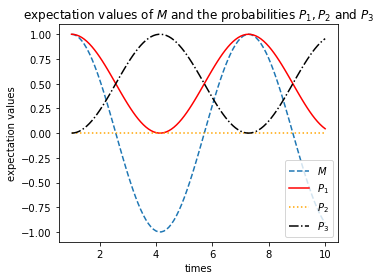

In [35]:
times=np.linspace(1,10,100)
result=sesolve(H,vec1,times,[M,P1,P2,P3])

#trace of expectations values

fig,ax=plt.subplots(figsize=(5,4))
ax.plot(result.times,result.expect[0], ls='--',label='$M$');
ax.plot(result.times,result.expect[1], ls='-',label='$P_1$',color='red');
ax.plot(result.times,result.expect[2], ls=':',label='$P_2$',color='orange');
ax.plot(result.times,result.expect[3], ls='-.',label='$P_3$',color='black');
ax.set_ylabel("expectation values");
ax.set_xlabel("times");
ax.set_title('expectation values of $M$ and the probabilities $P_1,P_2$ and $P_3$');
ax.legend(loc=4);

###  Exercise 3.4.7- Evolution of a spin state 1/2
The evolution of a quanton of spin 1/2 and magnetic moment $\mu$ in a magnetic field $\mathbf{B}(0,0,B)$ can be described by the hamiltonian $\HH=-\mathbf{\mu}\cdot\mathbf{B}=\omega\mt{S}_z$. The quanton enter in the magnetic field in the state $\ket{+}_x$.

**We will take along the exercise $\hbar\omega=0.5$**

1. Let's define $\HH$ and calculate his eigen values and eigen states $\ket{+}_z \mbox{ and } \ket{-}_z$

$\HH=\omega\mt{S}_z=\fr{\hbar\omega}{2}\begin{pmatrix} 1&0\\0&-1 \end{pmatrix}=\fr{1}{4}\begin{pmatrix} 1&0\\0&-1 \end{pmatrix}$

In QuTiP, the eigen values and vectors will be evaluated using `Q.eigenstates()` method.

In [14]:
H=Qobj([[1/4,0],[0,-1/4]])
Hvals,Hvects=H.eigenstates()
kpz=Hvects[1]
kmz=Hvects[0]
print('The eigen values of H are :\n',Hvals,'\n and his eigen vectors are; \n',kmz,kpz)

The eigen values of H are :
 [-0.25  0.25] 
 and his eigen vectors are; 
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.]
 [-1.]] Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-1.]
 [ 0.]]


2. Let's express the states $\ket{+}_x$ and $\ket{-}_x$ in terms of the eigen vectors of $\HH$ and define the projectors $\PS_+$ and $\PS_-$ on $\ket{+}_x$ and $\ket{-}_x$

  - The states $\ket{+}_x$ and $\ket{-}_x$  are eigen vectors of the matrix $\omega S_x=\fr{\hbar\omega}{2}\begin{pmatrix}0&1\\1&0\end{pmatrix}=\fr{1}{4}\begin{pmatrix}0&1\\1&0\end{pmatrix}$

To first get the eigen vectors of $S_x$, let's use the syntax `Sx.eigenstates()`

In [17]:
Sx=Qobj([[0,1/4],[1/4,0]])
Sxvals,Sxvects=Sx.eigenstates()
Sxvals,Sxvects

(array([-0.25,  0.25]),
 array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.70710678]
  [ 0.70710678]],
        Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.70710678]
  [0.70710678]]], dtype=object))

The eigen states $\omega S_x$ are $\ket{+}_x=\fr{1}{\sq{2}}\begin{pmatrix}1\\1\end{pmatrix}$ and $\ket{-}_x=\fr{1}{\sq{2}}\begin{pmatrix}-1\\1\end{pmatrix}$. In terms of $\ket{+}_z$ and $\ket{-}_z$ $$\ket{+}_x=-\fr{1}{\sq{2}}(\ket{+}_z+\ket{-}_z)\\\ket{-}_x=\fr{1}{\sq{2}}(\ket{+}_z-\ket{-}_z)$$

  - The projectors on $\ket{+}_x$ and $\ket{-}_x$ are repectively $\PS_+=\ket{+}_{xx}\bra{+} $ and $\PS_-=\ket{-}_{xx}\bra{-}$

We calculate the projector in QuTiP using the `Q.proj()` function.

In [18]:
kpx=Sxvects[1]
kmx=Sxvects[0]
Pp=kpx.proj()
Pm=kmx.proj()
print('The projectors on kpx and kmx are: \n', Pp,Pm)

The projectors on kpx and kmx are: 
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]] Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.5 -0.5]
 [-0.5  0.5]]


3. Let's solve the Shrödinger equation during the time interval $t\in [0,30]$ in step of 100 and calculate in the same interval the expectation values of $\PS_+,\PS_-,\HH$ and $\HH^2$.
 
  - In QuTiP, the shrödinger is solved using the function `sesolve(H,state,time,[ops])`. 

  To solve the shrödinger equation in the interval [1,30] we , will take:
    - `H` is the hamiltonian
    - `state` is the initial state $\ket{+}_x$.
    - `time` is the time interval we are working in.
    - `[ops]=[]` because are not yet calculating expectation values. .

In [26]:
time=np.linspace(1,30,100)
result0=sesolve(H,kpx,time,[])

- To avaluated the expectation values of $\PS_+,\PS_-,\HH$ and $\HH^2$, will just put in brackets `[Pp,Pm,H,H**2]`. The other functions of the dont't change. 

In [30]:
result1=sesolve(H,kpx,time,[Pp,Pm,H,H**2]) # the result object change

4. Let's calculate for $t=30$, the standard deflection $\Delta \HH$.
The standard defelction is given by : $\Delta \HH=\sq{\av{\mt{H}^2}-\av{\mt{H}}^2}$.
In QuTiP, the term $\av{\mt{H}^2}-\av{\mt{H}}^2$ is evaluated using the function `variance(oper, state)`.

We will extract the state $\ket{\psi(t=30)}$ in the previous object `result` object using his property `result.states[99]` understanding that the first index in QuTiP is `0`.

In [34]:
psi99=result0.states[99] # using the first result object becuse it cis the one which contains the times.
DH=np.sqrt(variance(H,psi99))
print('The standard deviation is',DH)

The standard deviation is 0.24999999999999997


5. Let's represent the probabilities of finding the quanton in the state $\ket{+}_x$ and in the state $\ket{+}_x$.
As it has been recalled, thes probabilities can be viewed respectively as the expectations values $\bra{\psi(t)}(\ket{+}_{xx}\bra{+})\ket{\psi(t)}$ and $\bra{\psi(t)}(\ket{-}_{xx}\bra{-})\ket{\psi(t)}$.
The script we propose to represent for the representation is thus:

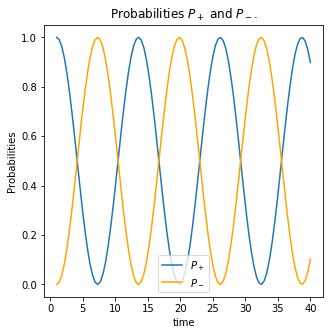

In [21]:
time_int=np.linspace(1,40,100) # the time interval
result=sesolve(H,kpx,time_int,[Pp,Pm]) # solve the shrödinger equation


# tracing the graphic

fig,ax=plt.subplots(figsize=(5,5))
ax.plot(result.times,result.expect[0],label='$P_+$');
ax.plot(result.times,result.expect[1], ls='-',label='$P_-$',color='orange');
ax.set_ylabel("Probabilities");
ax.set_xlabel("time");
ax.set_title('Probabilities $P_+$ and $P_-$.');
ax.legend(loc='lower center');

**We observe a magnetic resonance phenomenon**

In [23]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.5.0
Numpy,1.18.1
SciPy,1.4.1
matplotlib,3.1.3
Cython,0.29.15
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,7.12.0
Python,"3.7.6 (default, Jan 8 2020, 19:59:22) [GCC 7.3.0]"
OS,posix [linux]


In [6]:
!jupyter nbconvert --to html_with_toclenvs Tutorial4_TsemoR200924.ipynb

[NbConvertApp] Converting notebook Tutorial4_TsemoR200924.ipynb to html_with_toclenvs
[NbConvertApp] Writing 1024308 bytes to Tutorial4_TsemoR200924.html
